### Problem 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree

In [3]:
spam = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)

(a)

In [4]:
X = spam.iloc[:,:-1]
y = spam.iloc[:,-1]

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.20)

In [5]:
clf_decision_tree = DecisionTreeClassifier(max_depth=3)
clf_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

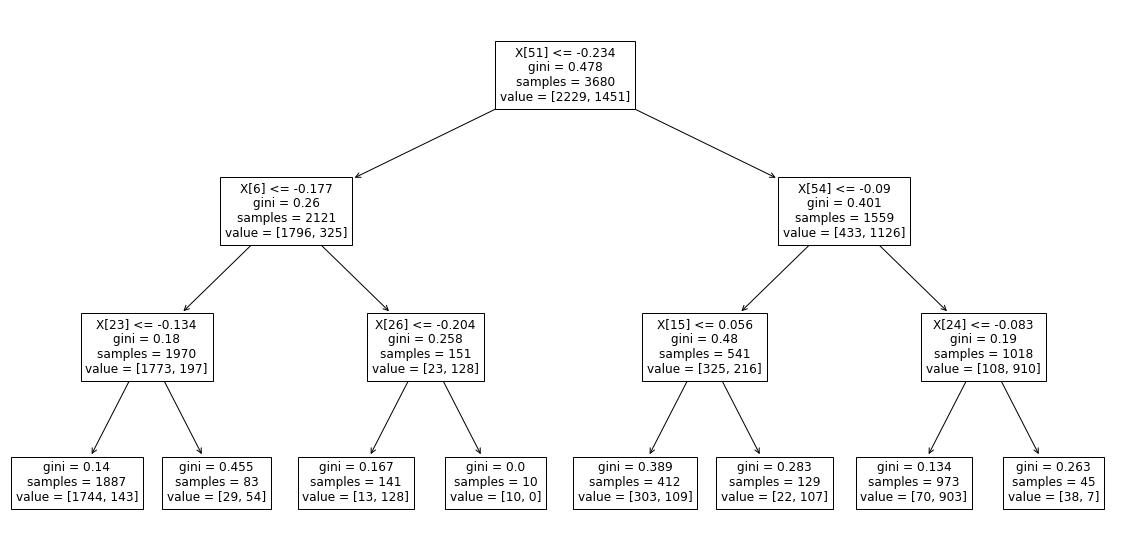

In [8]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf_decision_tree)
plt.show()

In [20]:
log_loss(y_test,clf_decision_tree.predict(X_test))

3.4876670868768973

In [17]:
accuracy_score(y_test,clf_decision_tree.predict(X_test))

0.8990228013029316

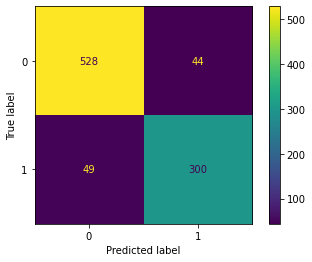

In [22]:
plot_confusion_matrix(clf_decision_tree, X_test, y_test)  

In [ ]:
# the decision tree has 3 depths and is able to a relatively high accuracy score of 0.8990
# The confusion matrix shows that out of 344 emails that were predicted as spam, 300 are true spams and 44 are not spams,
# meanwhile, out of 577 emails that are predicted as non-spam, 528 are non-spams and 49 are in fact spams

(b) Train a decision tree with its default parameters, visualize it, and compare it to what you
produced before both in terms of test error and interpretability. Visualize a confusion matrix.

In [10]:
clf_default = DecisionTreeClassifier()
clf_default.fit(X_train, y_train)

DecisionTreeClassifier()

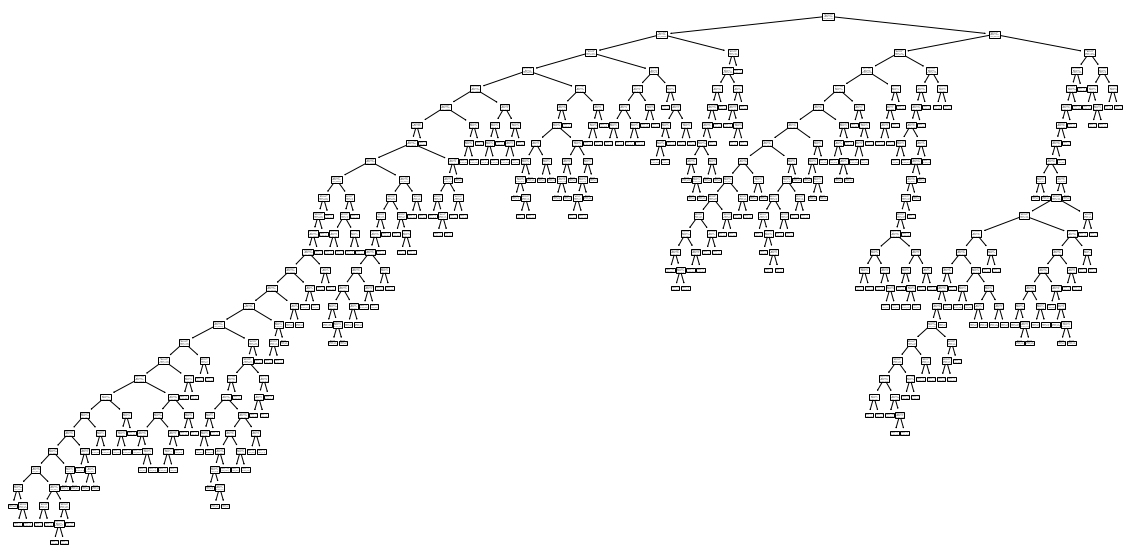

In [12]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf_default)
plt.show()

In [40]:
clf_default.get_depth()

33

In [41]:
accuracy_score(y_test,clf_default.predict(X_test))

0.9196525515743756

In [69]:
log_loss(y_test,clf_default.predict(X_test))

2.775137282432789

In [ ]:
# There are far more depths of the decision tree model using default parameters
# The accuracy score has also become slightly higher

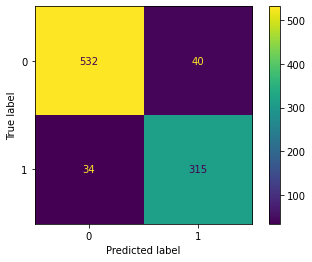

In [32]:
plot_confusion_matrix(clf_default, X_test, y_test)  

(c) Implement the following methods (no cross-validation necessary), and produce a table of test
error for each method, along with a confusion matrix.

k-nearest neighbors for a value of k chosen via cross-validation
One-layer neural network with 50 hidden nodes
Kernel SVM.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

In [46]:
KNN = KNeighborsClassifier

In [47]:
def plot_cross_validation_curve(param_range, train_scores, test_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    #Plot CV error as a function of alpha
    plt.title("Validation Curve")
    plt.xlabel("Parameter")
    plt.ylabel("Score")
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    parameter_best = param_range[np.argmax(test_scores_mean)]
    print('The best parameter is:', 
          parameter_best)
    best_train_scores = train_scores[param_range.index(parameter_best)]
    best_test_scores = test_scores[param_range.index(parameter_best)]
    print('The bests train scores of this parameter are:', best_train_scores)
    print('The bests test scores of this parameter are:', best_test_scores)

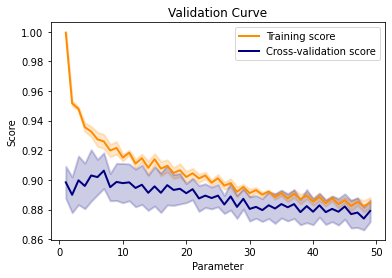

The best parameter is: 7
The bests train scores of this parameter are: [0.92221467 0.93002717 0.92017663 0.92459239 0.93274457]
The bests test scores of this parameter are: [0.92527174 0.89809783 0.91168478 0.90625    0.88994565]


In [49]:
param_range = [*range(1,50)]
train_scores, test_scores = validation_curve(estimator=KNN(),\
                                             X=X_train,y=y_train,cv=5,\
                                             param_name="n_neighbors",scoring="accuracy",
                                             param_range=param_range)
plot_cross_validation_curve(param_range, train_scores, test_scores)

In [64]:
KNN =KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)
accuracy_score(y_test, KNN.predict(X_test))

0.9001085776330076

In [65]:
log_loss(y_test, KNN.predict(X_test))

3.450163096445626

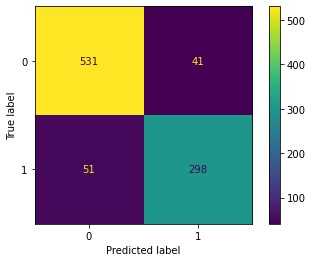

In [57]:
plot_confusion_matrix(KNN, X_test, y_test)  

In [53]:
from sklearn.neural_network import MLPClassifier

In [66]:
mlp_clf = MLPClassifier(hidden_layer_sizes=[50], max_iter=1000)
mlp_clf.fit(X_train, y_train)
accuracy_score(y_test, mlp_clf.predict(X_test))

0.9391965255157437

In [67]:
log_loss(y_test, mlp_clf.predict(X_test))

2.100107127500136

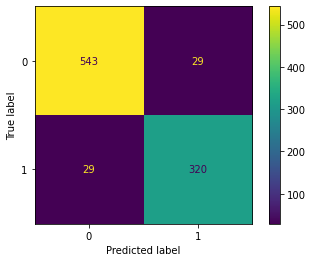

In [56]:
plot_confusion_matrix(mlp_clf1, X_test, y_test)  

In [58]:
from sklearn.svm import SVC

In [61]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [62]:
accuracy_score(y_test, svm.predict(X_test))

0.9446254071661238

In [86]:
log_loss(y_test, svm.predict(X_test))

1.9125871753437775

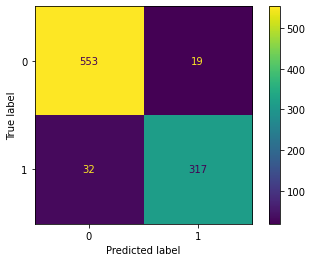

In [63]:
plot_confusion_matrix(svm, X_test, y_test)  

In [122]:
Losses = np.array([log_loss(y_test,clf_decision_tree.predict(X_test)),\
                      log_loss(y_test,clf_default.predict(X_test)),\
                      log_loss(y_test, KNN.predict(X_test)),\
                      log_loss(y_test, mlp_clf.predict(X_test)), \
                      log_loss(y_test, svm.predict(X_test))])
Test_accuracy = np.array([accuracy_score(y_test,clf_decision_tree.predict(X_test)),\
                              accuracy_score(y_test,clf_default.predict(X_test)),\
                              accuracy_score(y_test, KNN.predict(X_test)),\
                              accuracy_score(y_test, mlp_clf.predict(X_test)), \
                              accuracy_score(y_test, svm.predict(X_test))])

In [124]:
pd.DataFrame([Losses,Test_accuracy], columns=['DT_3_depth', 'DT_default', 'KNN','NN_50', 'SVM'],
            index=['Losses','Test Accuracy'])

,DT_3_depth,DT_default,KNN,NN_50,SVM
Losses,3.487667,2.775137,3.450163,2.100107,1.912587
Test Accuracy,0.899023,0.919653,0.900109,0.939197,0.944625


In [ ]:
# The SVM is preferred among the models
# Based on the accuracy score and loss values, it seems that the SVM has the highest accuracy for the test data
# and the lowest losss